In [130]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [131]:
data = pd.read_csv('full.csv')
print(data.shape)
print(data.head())
socMon = data['socMon']
btSoc = data['btSoc']
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
print(data.shape)
print(data.head())

(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN
(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN


### Features represented in respective units
 - vbatt in volt
 - ibatt in Amp
 - tempr in Celsius
 



In [132]:
data['vbatt'] = data['vbatt'].apply(lambda x: x * 1.0/100.0)
data['ibatt'] = data['ibatt'].apply(lambda x: x * 1.0/100.0)
data['tempr'] = data['tempr'].apply(lambda x: int(x, 16)/4.0)
print(data.head())

   vbatt  ibatt  tempr socMon btSoc  Unnamed: 5
0   3.89   0.25  23.50     93  96f0         NaN
1   3.91   0.12  30.00     98  9bf0         NaN
2   3.74   0.55  13.50     00  64f0         NaN
3   3.76   0.45  15.75     00  6c70         NaN
4   3.99   0.11  25.75     ad  aff0         NaN


### Target values in correct ranges
 - socMon and btSoc from 0.0 to 1.0

In [133]:
print(socMon.head())
print(btSoc.head())
socMon = socMon.apply(lambda x: int(x, 16)/255.0)
btSoc = btSoc.apply(lambda x: int(x, 16)/pow(2, 16))
data['socMon'] = data['socMon'].apply(lambda x: int(x, 16)/255.0)
data['btSoc'] = data['btSoc'].apply(lambda x: int(x, 16)/pow(2, 16))
print(socMon.head())
print(btSoc.head())


0    93
1    98
2    00
3    00
4    ad
Name: socMon, dtype: object
0    96f0
1    9bf0
2    64f0
3    6c70
4    aff0
Name: btSoc, dtype: object
0    0.576471
1    0.596078
2    0.000000
3    0.000000
4    0.678431
Name: socMon, dtype: float64
0    0.589600
1    0.609131
2    0.394287
3    0.423584
4    0.687256
Name: btSoc, dtype: float64


### Describe the features

In [134]:
print(np.min(socMon), np.mean(socMon), np.max(socMon), np.median(socMon), np.std(socMon))

0.0 0.5380509218612815 0.933333333333 0.607843137255 0.2722766754164631


### Plot individual features vs. target

   vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
0   3.89   0.25  23.50  0.576471  0.589600         NaN
1   3.91   0.12  30.00  0.596078  0.609131         NaN
2   3.74   0.55  13.50  0.000000  0.394287         NaN
3   3.76   0.45  15.75  0.000000  0.423584         NaN
4   3.99   0.11  25.75  0.678431  0.687256         NaN


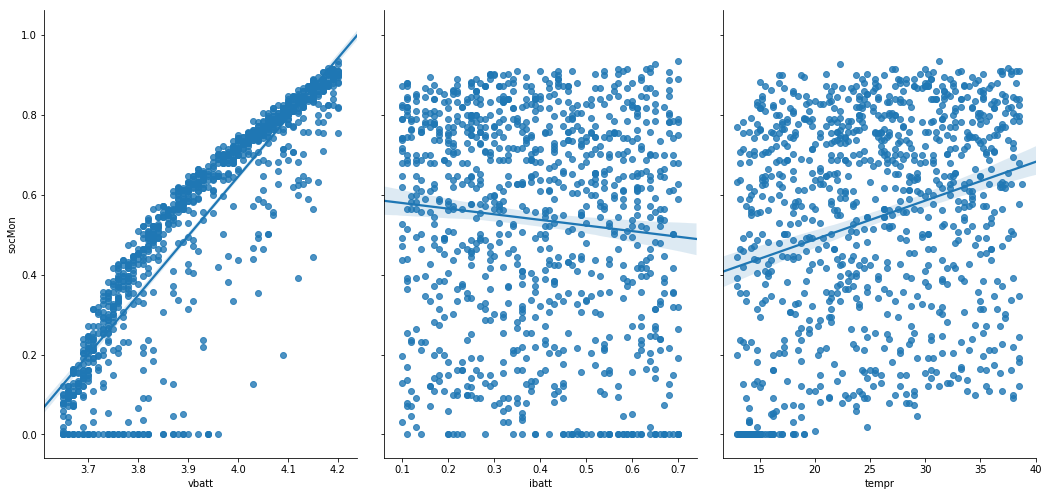

In [135]:
sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')
#sns.pairplot(data, x_vars=['ibatt'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='ibatt')
#sns.pairplot(data, x_vars=['tempr'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='tempr')
#sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='btSoc', size = 7, aspect = 0.7, kind='reg')
full_data = data.copy()
print(full_data.head())
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
data.drop(['Unnamed: 5'], axis=1, inplace=True)

### To again  show relation betw each feature and SoC, using subset of data

(1005, 6)
    vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
3    3.76   0.45  15.75  0.000000  0.423584         NaN
6    3.75   0.39  37.00  0.372549  0.394287         NaN
7    4.07   0.34  31.50  0.788235  0.794678         NaN
9    4.19   0.47  38.25  0.909804  0.911865         NaN
11   4.12   0.34  17.75  0.815686  0.843506         NaN
14   3.82   0.41  30.25  0.501961  0.521240         NaN
18   3.71   0.41  23.50  0.227451  0.267334         NaN
21   3.70   0.37  38.50  0.192157  0.218506         NaN
22   3.81   0.44  17.25  0.203922  0.511475         NaN
26   3.65   0.49  16.25  0.000000  0.150146         NaN
(347, 6)


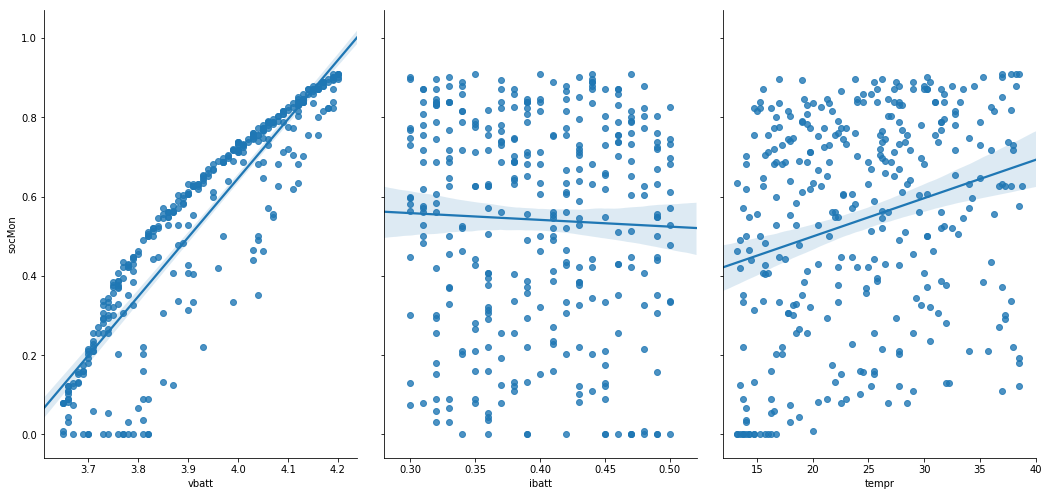

In [136]:
print(full_data.shape)
full_data.drop(full_data[full_data.ibatt > 0.5].index, inplace=True)
full_data.drop(full_data[full_data.ibatt < 0.3].index, inplace=True)
print(full_data.head(10))
print(full_data.shape)
sns.pairplot(full_data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')

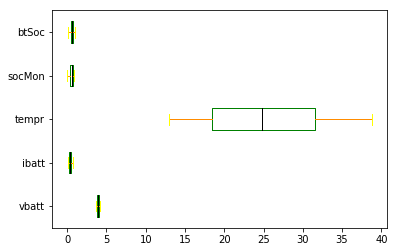

In [137]:
color = dict(boxes='Green', whiskers='DarkOrange', medians='Black', caps='Yellow')
data.plot.box(color=color, sym='r+', vert=False)

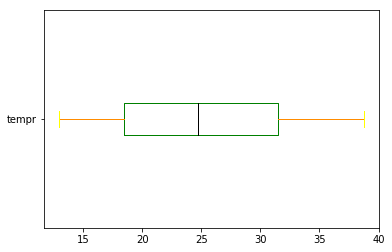

In [138]:
data['tempr'].plot.box(color=color, sym='r+', vert=False)

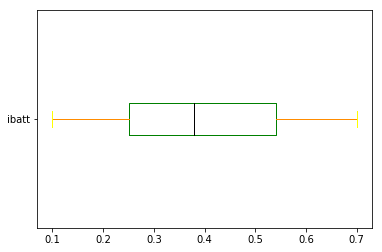

In [139]:
data['ibatt'].plot.box(color=color, sym='r+', vert=False)

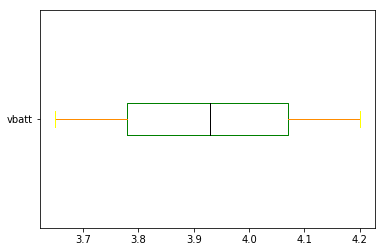

In [140]:
data['vbatt'].plot.box(color=color, sym='r+', vert=False)

(1005, 5)
[ 0.2514883   0.01266488  0.96494313  0.05203125  0.05263781]
vbatt      4.170000
ibatt      0.210000
tempr     16.000000
socMon     0.862745
btSoc      0.872803
Name: 230, dtype: float64


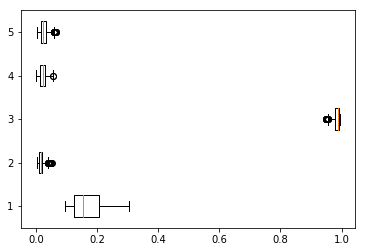

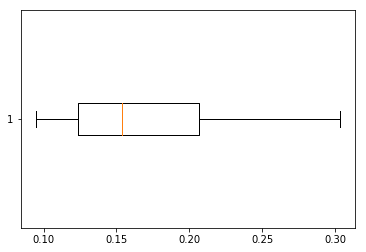

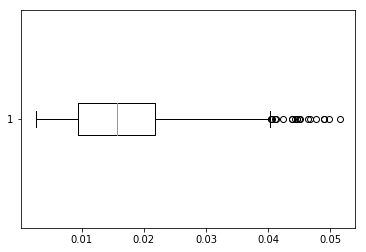

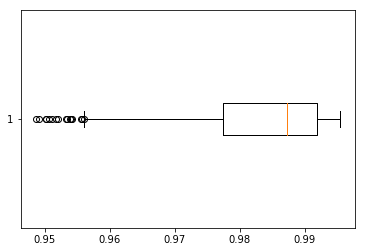

In [141]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data)
print(normalized_data.shape)
print(normalized_data[230])
print(data.iloc[230])
vs.dobox(normalized_data)
vs.dobox(normalized_data[:,0])
vs.dobox(normalized_data[:,1])
vs.dobox(normalized_data[:,2])


### Normalized and Scaled features
- The box plots below show that both, the features as well as target (socMon), lie in similar ranges and with mean close or equal to zero


(1005, 5)


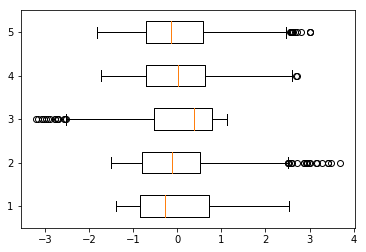

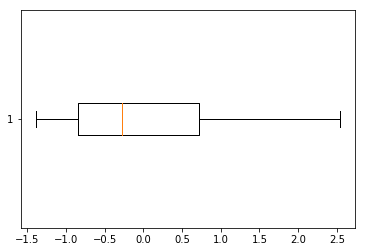

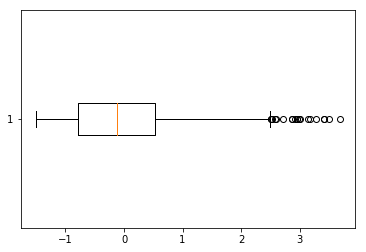

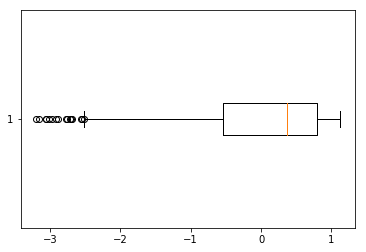

Below is boxplot for target variable socMon:


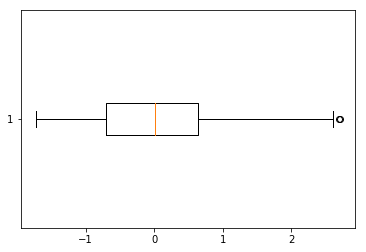

In [160]:
normAndScaled_data = preprocessing.scale(normalized_data)
print(normAndScaled_data.shape)
vs.dobox(normAndScaled_data)
vs.dobox(normAndScaled_data[:,0])
vs.dobox(normAndScaled_data[:,1])
vs.dobox(normAndScaled_data[:,2])
print("Below is boxplot for target variable socMon:")
vs.dobox(normAndScaled_data[:,3])



In [157]:
socMon = normAndScaled_data[:,3]
btSoc = normAndScaled_data[:,4]
